In [2]:
import re
import numpy as np    
import pandas as pd
import datetime as dt  
import pandas_datareader.data as web             

import matplotlib as mpl                         
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels import regression
import statsmodels.api as sm
import math
import scipy.optimize as sco
from scipy import optimize

import os

In [3]:
os.getcwd()

'/Users/elifriedmann'

In [4]:
os.chdir('/Users/elifriedmann/Downloads')

In [5]:
df = pd.read_csv('foia-7a-fy2020-present-asof-241231.csv', parse_dates = True)
df.head()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2098706902.py:1: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('foia-7a-fy2020-present-asof-241231.csv', parse_dates = True)


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,12/31/2024,7A,Virtuosity Fitness LLC,16778 Oakmont Avenue,Gaithersburg,MD,20877,"TD Bank, National Association",18409.0,NaN,...,6.0,CORPORATION,"Startup, Loan Funds will Open Business",CHGOFF,NaN,6/14/2024,24566.48,1,5,NaN
1,12/31/2024,7A,Pardon Ventures LLC,318 Illinois Avenue,Maumee,OH,43537,The Huntington National Bank,6560.0,NaN,...,5.0,CORPORATION,"Startup, Loan Funds will Open Business",EXEMPT,NaN,NaN,0.00,1,3,NaN
2,12/31/2024,7A,Assistance Hospice Care Inc.,"1415 E. Colorao St., Suite 207",GLENDALE,CA,91205,Bank of Hope,26610.0,NaN,...,28.0,CORPORATION,Change of Ownership,PIF,4/30/2021,NaN,0.00,0,3,NaN
3,12/31/2024,7A,RED BARN INVESTMENTS LLC,7130 AIRPORT HIGHWAY,HOLLAND,OH,43528,The Huntington National Bank,6560.0,NaN,...,5.0,CORPORATION,Existing or more than 2 years old,PIF,9/30/2024,NaN,0.00,1,3,NaN
4,12/31/2024,7A,Ferrandough's Pizzeria,231 Main St,ATTICA,NY,14011,Manufacturers and Traders Trust Company,588.0,NaN,...,27.0,INDIVIDUAL,Change of Ownership,PIF,10/31/2023,NaN,0.00,0,16,NaN


In [6]:
df2 = pd.read_csv('foia-7a-fy2010-fy2019-asof-241231.csv', parse_dates = True)
df2.head()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/3766873087.py:1: DtypeWarning: Columns (13,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('foia-7a-fy2010-fy2019-asof-241231.csv', parse_dates = True)


,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,SBADistrictOffice.1,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,12/31/2024,7A,Todd McNiff M.D. P.C.,314 W 14th St Fl 5,NEW YORK,NY,10014,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,CORPORATION,NaN,PIF,1/31/2017,NaN,0.0,1,2.0,NaN
1,12/31/2024,7A,Larry Roach LMHC,204 S Dillard St,WINTER GARDEN,FL,34787,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,INDIVIDUAL,NaN,CANCLD,NaN,NaN,0.0,0,2.0,NaN
2,12/31/2024,7A,Petz Place LLC,3690 W Estrella Parkway #101-1,GOODYEAR,AZ,85338,"JPMorgan Chase Bank, National Association",628.0,NaN,...,3.0,CORPORATION,NaN,PIF,11/30/2017,NaN,0.0,1,15.0,NaN
3,12/31/2024,7A,Phoenix Triad Inc.,5020 Burnet Rd,AUSTIN,TX,78756,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,CORPORATION,NaN,CANCLD,NaN,NaN,0.0,0,42.0,NaN
4,12/31/2024,7A,Quentin O Ade,1558 York Ave Apt 1A,NEW YORK,NY,10028,"JPMorgan Chase Bank, National Association",628.0,NaN,...,10.0,INDIVIDUAL,NaN,PIF,12/31/2014,NaN,0.0,1,3.0,NaN


In [7]:
lloans=df[['ApprovalDate','BorrName','BorrCity','BorrState','BorrZip', 'GrossApproval','NaicsCode','NaicsDescription','LoanStatus']]
eloans=df2[['ApprovalDate','BorrName','BorrCity','BorrState','BorrZip', 'GrossApproval','NaicsCode','NaicsDescription','LoanStatus']]
lloans

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,10/15/2019,Virtuosity Fitness LLC,Gaithersburg,MD,20877,25000,713940,Fitness and Recreational Sports Centers,CHGOFF
1,10/15/2019,Pardon Ventures LLC,Maumee,OH,43537,50000,453998,All Other Miscellaneous Store Retailers (excep...,EXEMPT
2,10/15/2019,Assistance Hospice Care Inc.,GLENDALE,CA,91205,370000,621610,Home Health Care Services,PIF
3,10/15/2019,RED BARN INVESTMENTS LLC,HOLLAND,OH,43528,25000,722511,Full-Service Restaurants,PIF
4,10/15/2019,Ferrandough's Pizzeria,ATTICA,NY,14011,190000,722513,Limited-Service Restaurants,PIF
...,...,...,...,...,...,...,...,...,...
289426,10/2/2024,Superior Power & Light INC.,POMPANO BEACH,FL,33069,75000,238210,Electrical Contractors,EXEMPT
289427,10/2/2024,Tran Automotive Group LLC,ATLANTA,GA,30329,3486000,811111,General Automotive Repair,EXEMPT
289428,10/2/2024,Pratts expert roofing and clai,Dalton,GA,30721,500000,236115,New Single-Family Housing Construction (except...,COMMIT
289429,10/2/2024,TRUST & DEDICATION INC,COLORADO SPRINGS,CO,80927,18600,238110,Poured Concrete Foundation and Structure Contr...,EXEMPT


In [8]:
for i in lloans.index:
    if lloans.loc[i,'BorrCity']!=lloans.loc[i,'BorrCity'].title():
        lloans.loc[i,'BorrCity']=lloans.loc[i,'BorrCity'].title()
    else:
        continue
    

In [9]:
for i in eloans.index:
    if eloans.loc[i,'BorrCity']!=eloans.loc[i,'BorrCity'].title():
        eloans.loc[i,'BorrCity']=eloans.loc[i,'BorrCity'].title()
    else:
        continue

In [10]:
eloans['BorrCity'] = eloans['BorrCity'].str.title()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/339914237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eloans['BorrCity'] = eloans['BorrCity'].str.title()


In [11]:
lloans['BorrCity'] = lloans['BorrCity'].str.title()

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/3125145247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['BorrCity'] = lloans['BorrCity'].str.title()


In [12]:
lloans.dropna(subset=['LoanStatus'], inplace=True)


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2962020788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.dropna(subset=['LoanStatus'], inplace=True)


In [13]:
eloans=eloans.loc[:,:].dropna(subset=['LoanStatus'])

In [14]:
eloans.isna().sum()

ApprovalDate          0
BorrName             30
BorrCity              0
BorrState             0
BorrZip               0
GrossApproval         0
NaicsCode             2
NaicsDescription    602
LoanStatus            0
dtype: int64

In [15]:
eloans=eloans.loc[:,:].dropna(subset=['NaicsCode'])
eloans.isna().sum()

ApprovalDate          0
BorrName             30
BorrCity              0
BorrState             0
BorrZip               0
GrossApproval         0
NaicsCode             0
NaicsDescription    600
LoanStatus            0
dtype: int64

In [24]:
eloans['NaicsDescription'].isna().sum()

600

In [25]:
# Filter rows where NaicsDescription is NaN
# Get unique NaicsCode values from those rows
h = eloans.loc[eloans['NaicsDescription'].isna(), 'NaicsCode'].dropna().unique().tolist()
h

[532289.0,
 486990.0,
 532281.0,
 561510.0,
 621210.0,
 451120.0,
 484110.0,
 524192.0,
 541940.0,
 321999.0,
 722110.0,
 532283.0,
 452319.0,
 452210.0,
 333310.0,
 532284.0,
 444180.0,
 541714.0,
 811210.0,
 449121.0,
 512250.0,
 541715.0,
 517311.0,
 517312.0,
 449210.0,
 541713.0,
 211120.0,
 333914.0,
 452311.0,
 459999.0,
 211130.0,
 532282.0,
 335220.0,
 457110.0,
 449110.0,
 445320.0,
 459910.0]

In [28]:
for a in lloans.index:
    if lloans.loc[a, 'NaicsCode'] in h:
        print(lloans.loc[a, 'NaicsDescription'])

Offices of Dentists
Offices of Dentists
Offices of Dentists
Offices of Dentists
General Freight Trucking, Local
General Freight Trucking, Local
General Freight Trucking, Local
General Freight Trucking, Local
General Freight Trucking, Local
Veterinary Services
General Freight Trucking, Local
Veterinary Services
General Freight Trucking, Local
General Freight Trucking, Local
Offices of Dentists
General Freight Trucking, Local
Travel Agencies
Offices of Dentists
General Freight Trucking, Local
General Freight Trucking, Local
nan
nan
nan
General Freight Trucking, Local
General Freight Trucking, Local
Offices of Dentists
General Freight Trucking, Local
General Freight Trucking, Local
Offices of Dentists
Offices of Dentists
General Freight Trucking, Local
nan
nan
Offices of Dentists
General Freight Trucking, Local
Offices of Dentists
General Freight Trucking, Local
Offices of Dentists
General Freight Trucking, Local
Offices of Dentists
General Freight Trucking, Local
General Freight Trucking

In [29]:
b=0
for a in lloans.index:
    if lloans.loc[a,'BorrState']=='NY':
        if lloans.loc[a,'BorrCity']== 'Brooklyn':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'
        elif lloans.loc[a,"BorrCity"]=='The Bronx':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'
        elif lloans.loc[a,'BorrCity']=='Bronx':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'
        elif lloans.loc[a,'BorrCity']=='Manhattan':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'
        elif lloans.loc[a,'BorrCity']=='Queens':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'
        elif lloans.loc[a,'BorrCity']=='Staten Island':
            b=b+1
            lloans.loc[a,'BorrCity']='New York'

b

3446

In [30]:
for i in lloans.index:
    if lloans.loc[i,'BorrState']=='NY':
        if lloans.loc[i,"BorrCity"].__contains__('Bronx') or lloans.loc[i,"BorrCity"].__contains__('Staten Island'):
            if not lloans.loc[i,"BorrCity"].__contains__('Bronxville'):
                print(lloans.loc[i,"BorrCity"])
                lloans.loc[i,'BorrCity']='New York'
        

Staten Island 
Bronx 
Bronx 
Bronx 


In [31]:
b=0
for a in eloans.index:
    if eloans.loc[a,'BorrState']=='NY':
        if eloans.loc[a,'BorrCity']== 'Brooklyn':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
        elif eloans.loc[a,"BorrCity"]=='The Bronx':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
        elif eloans.loc[a,'BorrCity']=='Bronx':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
        elif eloans.loc[a,'BorrCity']=='Manhattan':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
        elif eloans.loc[a,'BorrCity']=='Queens':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
        elif eloans.loc[a,'BorrCity']=='Staten Island':
            b=b+1
            eloans.loc[a,'BorrCity']='New York'
            
b

4944

In [32]:

for i in eloans.index:
    if eloans.loc[i,'BorrCity'].__contains__('Staten Island'):
        print(eloans.loc[i,'BorrCity']+", "+eloans.loc[i,'BorrState'])

In [33]:
eloans[:309]

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,9/11/2010,Todd McNiff M.D. P.C.,New York,NY,10014,25000,621111.0,Offices of Physicians (except Mental Health Sp...,PIF
1,9/11/2010,Larry Roach LMHC,Winter Garden,FL,34787,10300,624190.0,Other Individual and Family Services,CANCLD
2,9/11/2010,Petz Place LLC,Goodyear,AZ,85338,100000,453910.0,Pet and Pet Supplies Stores,PIF
3,9/11/2010,Phoenix Triad Inc.,Austin,TX,78756,206500,722110.0,Full-Service Restaurants,CANCLD
4,9/11/2010,Quentin O Ade,New York,NY,10028,15000,812990.0,All Other Personal Services,PIF
...,...,...,...,...,...,...,...,...,...
304,2/18/2010,Vinuales Holdings LLC and Carr,Tampa,FL,33609,707000,621210.0,Offices of Dentists,PIF
305,2/18/2010,Del Restaurant Group LLC,Macomb,MI,48044,160800,722211.0,Limited-Service Restaurants,PIF
306,2/18/2010,Randy L. Beswick d/b/a Beswick,Belleville,IL,62226,11000,561730.0,Landscaping Services,PIF
307,2/18/2010,Dale W. Engle Certified Publi,Tigard,OR,97223,25000,541211.0,Offices of Certified Public Accountants,PIF


In [34]:
eloans["ApprovalDate"]=pd.to_datetime(eloans["ApprovalDate"])
lloans["ApprovalDate"]=pd.to_datetime(lloans["ApprovalDate"])

eloans = eloans[eloans["ApprovalDate"] >= pd.to_datetime("2014-10-15")]

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/208532148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans["ApprovalDate"]=pd.to_datetime(lloans["ApprovalDate"])


In [35]:
eloans[:19027]

,ApprovalDate,BorrName,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
243525,2015-09-11,ARYANKUMAR LLC,Arab,AL,35016,1245000,721110.0,Hotels (except Casino Hotels) and Motels,EXEMPT
243526,2015-09-11,Samuel Ramirez,Dodge City,KS,67801,20800,484230.0,Specialized Freight (except Used Goods) Trucki...,PIF
243527,2015-09-11,Reuben Graber,Hillpoint,WI,53937,30000,236115.0,New Single-Family Housing Construction (except...,CANCLD
243528,2015-09-11,Village Grill 3 Inc,Royal Oak,MI,48067,50300,722511.0,Full-Service Restaurants,PIF
243529,2015-09-11,SJC Telecom Inc.,New York,NY,11220,31500,423690.0,Other Electronic Parts and Equipment Merchant ...,PIF
...,...,...,...,...,...,...,...,...,...
263319,2015-06-08,6-4-3 LLC,Westminster,CO,80031,125000,722515.0,Snack and Nonalcoholic Beverage Bars,PIF
263320,2015-06-08,Cosmetics Gallery Inc,Torrance,CA,90501,1000000,424990.0,Other Miscellaneous Nondurable Goods Merchant ...,EXEMPT
263321,2015-06-08,SUPREME LAWN AND LANDSCAPING,Waite Park,MN,56387,47500,561730.0,Landscaping Services,PIF
263322,2015-06-08,F & L Subs LLC,Bronxville,NY,10708,110000,722511.0,Full-Service Restaurants,PIF


In [36]:
eloans.to_csv("loans_info_2015-19.csv", index=False)
lloans.to_csv("loans_info_2020-24.csv", index=False)

In [37]:
eloans.drop(columns=['BorrName'], inplace=True)

In [38]:
for i in lloans.index:
    if any(char in lloans.loc[i, 'BorrCity'] for char in [',', '0', '1', '2', '3', '4', '5', '6','7','8','9']):
        print(lloans.loc[i,'BorrCity'])
        lloans.drop(i, inplace=True)

    


North Ridgeville,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Eureka Springs, 


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Henderson,
Lee&#39;S Summit


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Lee&#39;S Summit
2325 Marietta Blvd Nw
Sandy Springs, Ga


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Seaside,
30354


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Shelby Twp,
Shelby Twp,
Shelby Twp,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Fairview Park,
Long Lake,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


New Orleans,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


T6 R8 Wells
Murray,
Norton Shores,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

New Albany,
1473 Schenectady
Valley Village6116


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

St Paul, Mn 55413


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Sharonville, Oh


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Whitinsville,
F5 Construction Services Llc


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Bridgeport,
Merced,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Brooklyn, Ny
Gardena, Ca 90247
Mogadore,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Hot Springs,
Hot Springs, 
Warsaw,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Topeka, Ks


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Sharonville, Oh
Sharonville, Oh


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


O&#39;Fallon


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


 Dowagiac,
Lakewood, Oh 44107


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


1111 Bellevue St Unit 201
1111 Bellevue St Unit 201
1111 Bellevue St Unit 201
Coto Laurel,  Ponce


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

8985 E Liberty North Rd
Rock Creek,
Zionsville, In


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Amelia, Oh  45102
Philadelphia, Pa


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Knoxville, 


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


St Johns,
Mentor, Oh 44060
Byron Center,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Byron Center,
Byron Center,
North Olmsted,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

341558970


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Pittsburgh,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Washington, Pa 15301
Shaker Heights,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Johns Creek,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Lawrenceville,
Mason,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Mason,
Sterling Hts.,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Three Rivers,
Three Rivers,
Westlake,
Westlake,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Berkley, Mi 48072
Sheffield Vlg, Oh 44035
Middleburg,
Middleburg,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Fishers , In 46040
West Milton,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Norton Shores,
Bellevue,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Unit 2
Unit 2
Park Hills,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Ottawa, Oh 45875
Atlanta, Ga


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Pittsboro,
Arnaudville, 


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


339112
339112


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Chicago,
Chicago,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Walton, Ky 41094
Bridgeton,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Overland Park,
Alpharetta,
Cranberry Twp,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Des Plaines,
Des Plaines,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Westchester,
San Fransisco,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


St Johns,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Newtown,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Chapmanville,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Brickell, Miami


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


North Ridgeville,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Aliquippa, Pa 15001


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Lakewood, Oh 44107
Queens,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Lakewood, Oh 44107
Greer,
Cincinnati,
Greer,
Paramus,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

Paramus,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


88-1860677
8985 E Liberty North Rd


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


9130 Euclid Ct


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Buffalo, Amherst


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Bay Shore,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Rigby, Id


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Cleveland,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


San Jose,
Huntingdon Valley,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


Los Banos,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


12445 E 39Th Ave
5019 W Broad St Ne
Buffalo, Amherst


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans

1661 Juniper Creek Rd
N92W15600 Megal Dr


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


New York,


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


32974 Anasazi Dr


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/322798604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(i, inplace=True)


In [39]:
for i in lloans.index:
    if any(char in lloans.loc[i, 'BorrCity'] for char in [',', '0', '1', '2', '3', '4', '5', '6','7','8','9']):
        print(lloans.loc[i,'BorrCity'])

In [40]:
import re
mask = eloans['BorrCity'].str.contains(r'[,\d]', na=False)

# Optional: print the cities you're dropping
print(eloans.loc[mask, 'BorrCity'])

# Drop the rows
eloans.drop(index=eloans[mask].index, inplace=True)


243622               Langley, Afb
243923                 Laredo, Tx
248153           Lee'S Summit, Mo
250359                Schaumburg,
250422                Schaumburg,
                   ...           
536853                Shaker Hts,
537487                New Albany,
538393              Jacksonville,
544890                 Tipp City,
545470    Oklahoma City, Oklahoma
Name: BorrCity, Length: 139, dtype: object


In [41]:
lloans.drop(columns=['BorrName'], inplace=True)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/3290664573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(columns=['BorrName'], inplace=True)


In [42]:


cloans = pd.concat([eloans, lloans], ignore_index=True)


In [43]:
cloans

,ApprovalDate,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus
0,2015-09-11,Arab,AL,35016,1245000,721110.0,Hotels (except Casino Hotels) and Motels,EXEMPT
1,2015-09-11,Dodge City,KS,67801,20800,484230.0,Specialized Freight (except Used Goods) Trucki...,PIF
2,2015-09-11,Hillpoint,WI,53937,30000,236115.0,New Single-Family Housing Construction (except...,CANCLD
3,2015-09-11,Royal Oak,MI,48067,50300,722511.0,Full-Service Restaurants,PIF
4,2015-09-11,New York,NY,11220,31500,423690.0,Other Electronic Parts and Equipment Merchant ...,PIF
...,...,...,...,...,...,...,...,...
589593,2024-10-02,Pompano Beach,FL,33069,75000,238210.0,Electrical Contractors,EXEMPT
589594,2024-10-02,Atlanta,GA,30329,3486000,811111.0,General Automotive Repair,EXEMPT
589595,2024-10-02,Dalton,GA,30721,500000,236115.0,New Single-Family Housing Construction (except...,COMMIT
589596,2024-10-02,Colorado Springs,CO,80927,18600,238110.0,Poured Concrete Foundation and Structure Contr...,EXEMPT


In [44]:
lloans.drop(columns=['NaicsDescription'], inplace=True)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/1061995318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans.drop(columns=['NaicsDescription'], inplace=True)


In [45]:
h=[]
for a in lloans:
    h.append(a)
print(h)

['ApprovalDate', 'BorrCity', 'BorrState', 'BorrZip', 'GrossApproval', 'NaicsCode', 'LoanStatus']


In [46]:
import pandas as pd

# Pick relevant categorical features
cols = ['BorrCity', 'BorrState', 'LoanStatus']
df_items = lloans[cols].copy()

# Create a transaction ID
df_items['TransactionID'] = df_items.index  # or use a column if you already have one



In [47]:
# Convert a continuous feature into categories
lloans['GrossApprovalBin'] = pd.qcut(lloans['GrossApproval'], q=5)


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/415041071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['GrossApprovalBin'] = pd.qcut(lloans['GrossApproval'], q=5)


In [48]:
# Convert to datetime if needed
lloans['ApprovalDate'] = pd.to_datetime(lloans['ApprovalDate'], errors='coerce')

# Extract features
lloans['ApprovalYear'] = lloans['ApprovalDate'].dt.year.astype(str)
lloans['ApprovalMonth'] = lloans['ApprovalDate'].dt.month_name()
lloans['ApprovalQuarter'] = lloans['ApprovalDate'].dt.to_period('Q')
lloans['ApprovalQuarterStr'] = lloans['ApprovalQuarter'].astype(str)
quarter_order = sorted(lloans['ApprovalQuarterStr'].unique())  # this will auto-order them chronologically
lloans['ApprovalQuarterStr'] = pd.Categorical(lloans['ApprovalQuarterStr'], categories=quarter_order, ordered=True)
lloans['ApprovalQuarterStr'] = pd.Categorical(lloans['ApprovalQuarterStr'], categories=quarter_order, ordered=True)
# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2524146572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['ApprovalDate'] = pd.to_datetime(lloans['ApprovalDate'], errors='coerce')
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2524146572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['ApprovalYear'] = lloans['ApprovalDate'].dt.year.astype(str)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2524146572.py:6: SettingWithCopyWarning: 
A valu

In [49]:
lloans['BorrZip'] = lloans['BorrZip'].astype(str).str.zfill(5)  # pad with zeros if needed


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/3623115507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['BorrZip'] = lloans['BorrZip'].astype(str).str.zfill(5)  # pad with zeros if needed


In [50]:
lloans['ZipPrefix'] = lloans['BorrZip'].str[:1]  # or [:3] for more granularity


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/349932946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['ZipPrefix'] = lloans['BorrZip'].str[:1]  # or [:3] for more granularity


In [51]:
zip_region_map = {
    '0': 'East',
    '1': 'East',
    '2': 'South',
    '3': 'South',
    '4': 'Midwest',
    '5': 'Midwest',
    '6': 'Midwest',
    '7': 'South',
    '8': 'West',
    '9': 'West'
}

lloans['Region'] = lloans['ZipPrefix'].map(zip_region_map)


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/303153236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['Region'] = lloans['ZipPrefix'].map(zip_region_map)


In [52]:
lloans['NaicsCode'] = lloans['NaicsCode'].astype(str) # 'Sector'

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/1569526623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['NaicsCode'] = lloans['NaicsCode'].astype(str) # 'Sector'


In [53]:
lloans['NaicsCodePrefix'] = lloans['NaicsCode'].str[:2]  # or [:3] for more granularity


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/3905261235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['NaicsCodePrefix'] = lloans['NaicsCode'].str[:2]  # or [:3] for more granularity


In [54]:
naics_region_map = {
    '11':'Agriculture,Forestry, Fishing and Hunting',
    '21':'Mining,Quarrying, and Oil and Gas Extraction',
    '22':"Utilities",
    '23':"Construction",
    "31":'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    "42":'Wholesale Trade',
    '44':'Retail Trade',
    '45':'Retail Trade',
    '48':'Transportation and Warehousing',
    '49':'Transportation and Warehousing',
    '51':'Information',
    '52':'Finance and Insurance',
    '53':'Real Estate and Rental and Leasing',
    "54":'Professional, Scientific, and Technical Services',
    '55':"Management of Companies and Enterprises",
    '56':'Administrative and Support and Waste Management and Remediation Services',
    "61":'Educational Services',
    '62':'Health Care and Social Assistance',
    '71':'Arts, Entertainment, and Recreation',
    '72':'Accommodation and Food Services',
    '81':'Other Services (except Public Administration)',
    '92':'Public Administration (not covered in economic census)'

}

lloans['Sector'] = lloans['NaicsCodePrefix'].map(naics_region_map)


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/340185872.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloans['Sector'] = lloans['NaicsCodePrefix'].map(naics_region_map)


In [78]:
basket = lloans.groupby(['ApprovalMonth','Region','Sector','GrossApproval', 'LoanStatus'])['Sector'] \
           .count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket=basket.astype(bool)




In [79]:
# Select relevant categorical features
mba_features = ['Region', 'Sector','LoanStatus', 'GrossApprovalBin', 'ApprovalYear']

# Create the one-hot encoded basket
basket = pd.get_dummies(lloans[mba_features])

# Convert to bool for fpgrowth (optional but recommended)
basket = basket.astype(bool)


In [80]:
basket

,Region_East,Region_Midwest,Region_South,Region_West,Sector_Accommodation and Food Services,Sector_Administrative and Support and Waste Management and Remediation Services,"Sector_Agriculture,Forestry, Fishing and Hunting","Sector_Arts, Entertainment, and Recreation",Sector_Construction,Sector_Educational Services,...,"GrossApprovalBin_(50000.0, 135000.0]","GrossApprovalBin_(135000.0, 300000.0]","GrossApprovalBin_(300000.0, 719400.0]","GrossApprovalBin_(719400.0, 5000000.0]",ApprovalYear_2019,ApprovalYear_2020,ApprovalYear_2021,ApprovalYear_2022,ApprovalYear_2023,ApprovalYear_2024
0,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289426,False,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
289427,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
289428,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
289429,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [81]:

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)



In [59]:
#from mlxtend.frequent_patterns import apriori

#frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)


In [82]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules = rules[rules['lift'] > 1.5]



In [83]:
# Show key columns
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)



,antecedents,consequents,support,confidence,lift
172,"(LoanStatus_COMMIT, GrossApprovalBin_(300000.0...",(ApprovalYear_2024),0.011613,0.881165,3.369713
167,"(LoanStatus_COMMIT, GrossApprovalBin_(135000.0...",(ApprovalYear_2024),0.015074,0.843164,3.224391
171,"(LoanStatus_COMMIT, Region_West)",(ApprovalYear_2024),0.016215,0.804460,3.076381
170,"(Region_South, LoanStatus_COMMIT)",(ApprovalYear_2024),0.020709,0.804459,3.076377
168,"(GrossApprovalBin_(50000.0, 135000.0], LoanSta...",(ApprovalYear_2024),0.010579,0.775862,2.967019
164,(LoanStatus_COMMIT),(ApprovalYear_2024),0.066408,0.773612,2.958412
169,"(Region_East, LoanStatus_COMMIT)",(ApprovalYear_2024),0.014776,0.752200,2.876531
166,"(LoanStatus_COMMIT, Region_Midwest)",(ApprovalYear_2024),0.014707,0.724578,2.770902
165,"(GrossApprovalBin_(999.999, 50000.0], LoanStat...",(ApprovalYear_2024),0.020118,0.639943,2.447242
138,"(Sector_Transportation and Warehousing, Region...","(GrossApprovalBin_(999.999, 50000.0])",0.010410,0.403944,1.597659


In [84]:
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
130,(Sector_Transportation and Warehousing),(Region_Midwest),0.062912,0.261063,0.025771,0.409628,1.569075,1.0,0.009347,1.251646,0.387031,0.086419,0.201052,0.254171
132,(Sector_Transportation and Warehousing),"(GrossApprovalBin_(999.999, 50000.0])",0.062912,0.252835,0.025408,0.403858,1.597318,1.0,0.009501,1.253334,0.399056,0.087510,0.202128,0.252174
134,"(Sector_Transportation and Warehousing, LoanSt...",(Region_Midwest),0.041118,0.261063,0.016619,0.404187,1.548235,1.0,0.005885,1.240216,0.369287,0.058198,0.193689,0.233923
137,"(GrossApprovalBin_(999.999, 50000.0], Sector_T...",(Region_Midwest),0.025408,0.261063,0.010410,0.409716,1.569411,1.0,0.003777,1.251832,0.372277,0.037709,0.201171,0.224795
138,"(Sector_Transportation and Warehousing, Region...","(GrossApprovalBin_(999.999, 50000.0])",0.025771,0.252835,0.010410,0.403944,1.597659,1.0,0.003894,1.253515,0.383980,0.038815,0.202243,0.222558
164,(LoanStatus_COMMIT),(ApprovalYear_2024),0.085841,0.261495,0.066408,0.773612,2.958412,1.0,0.043961,3.262111,0.724142,0.236386,0.693450,0.513782
165,"(GrossApprovalBin_(999.999, 50000.0], LoanStat...",(ApprovalYear_2024),0.031437,0.261495,0.020118,0.639943,2.447242,1.0,0.011897,2.051076,0.610571,0.073742,0.512451,0.358439
166,"(LoanStatus_COMMIT, Region_Midwest)",(ApprovalYear_2024),0.020298,0.261495,0.014707,0.724578,2.770902,1.0,0.009400,2.681361,0.652348,0.055066,0.627055,0.390411
167,"(LoanStatus_COMMIT, GrossApprovalBin_(135000.0...",(ApprovalYear_2024),0.017878,0.261495,0.015074,0.843164,3.224391,1.0,0.010399,4.708763,0.702422,0.057033,0.787630,0.450404
168,"(GrossApprovalBin_(50000.0, 135000.0], LoanSta...",(ApprovalYear_2024),0.013636,0.261495,0.010579,0.775862,2.967019,1.0,0.007014,3.294866,0.672126,0.039990,0.696498,0.408159


In [85]:
# Convert a continuous feature into categories
eloans['GrossApprovalBin'] = pd.qcut(eloans['GrossApproval'], q=5)


In [86]:
# Convert to datetime if needed
eloans['ApprovalDate'] = pd.to_datetime(eloans['ApprovalDate'], errors='coerce')

# Extract features
eloans['ApprovalYear'] = eloans['ApprovalDate'].dt.year.astype(str)
eloans['ApprovalMonth'] = eloans['ApprovalDate'].dt.month_name()
eloans['ApprovalQuarter'] = eloans['ApprovalDate'].dt.to_period('Q')
eloans['ApprovalQuarterStr'] = eloans['ApprovalQuarter'].astype(str)
quarter_order = sorted(eloans['ApprovalQuarterStr'].unique())  # this will auto-order them chronologically
eloans['ApprovalQuarterStr'] = pd.Categorical(eloans['ApprovalQuarterStr'], categories=quarter_order, ordered=True)
# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Set ordered categorical type
eloans['ApprovalMonth'] = pd.Categorical(eloans['ApprovalMonth'], categories=month_order, ordered=True)

In [87]:
eloans['BorrZip'] = eloans['BorrZip'].astype(str).str.zfill(5)  # pad with zeros if needed


In [88]:
eloans['ZipPrefix'] = eloans['BorrZip'].str[:1]  # or [:3] for more granularity


In [89]:
zip_region_map = {
    '0': 'East',
    '1': 'East',
    '2': 'South',
    '3': 'South',
    '4': 'Midwest',
    '5': 'Midwest',
    '6': 'Midwest',
    '7': 'South',
    '8': 'West',
    '9': 'West'
}

eloans['Region']=eloans['ZipPrefix'].map(zip_region_map)


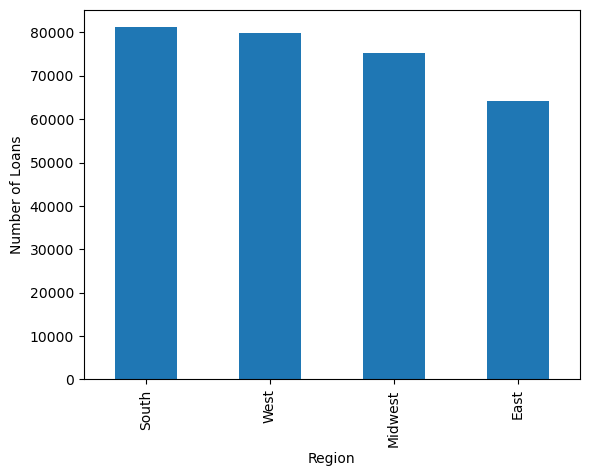

In [90]:
eloans['Region'].value_counts().plot(kind='bar');
plt.ylabel('Number of Loans');


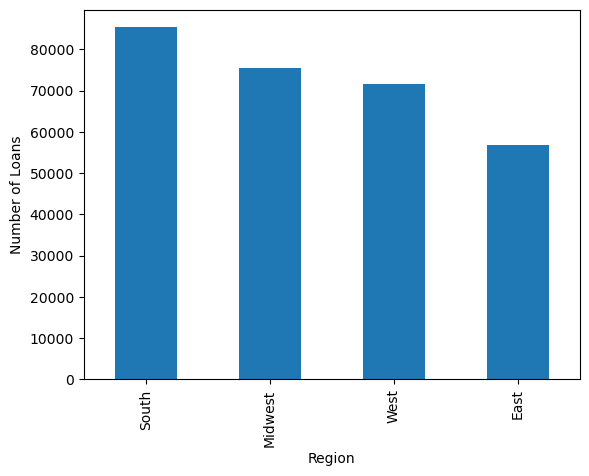

In [91]:
lloans['Region'].value_counts().plot(kind='bar');
plt.ylabel('Number of Loans');

In [92]:
eloans['NaicsCode'] = eloans['NaicsCode'].astype(str) # 'Sector'

In [93]:
eloans['NaicsCodePrefix'] = eloans['NaicsCode'].str[:2].copy()  


In [94]:
naics_region_map = {
    '11':'Agriculture,Forestry, Fishing and Hunting',
    '21':'Mining,Quarrying, and Oil and Gas Extraction',
    '22':"Utilities",
    '23':"Construction",
    "31":'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    "42":'Wholesale Trade',
    '44':'Retail Trade',
    '45':'Retail Trade',
    '48':'Transportation and Warehousing',
    '49':'Transportation and Warehousing',
    '51':'Information',
    '52':'Finance and Insurance',
    '53':'Real Estate and Rental and Leasing',
    "54":'Professional, Scientific, and Technical Services',
    '55':"Management of Companies and Enterprises",
    '56':'Administrative and Support and Waste Management and Remediation Services',
    "61":'Educational Services',
    '62':'Health Care and Social Assistance',
    '71':'Arts, Entertainment, and Recreation',
    '72':'Accommodation and Food Services',
    '81':'Other Services (except Public Administration)',
    '92':'Public Administration (not covered in economic census)'

}

eloans['Sector'] = eloans['NaicsCodePrefix'].map(naics_region_map)


In [96]:
#




In [97]:
# Select relevant categorical features
mba_features = ['Region','Sector','LoanStatus', 'GrossApprovalBin', 'ApprovalQuarterStr']

# Create the one-hot encoded basket
basket = pd.get_dummies(eloans[mba_features])

# Convert to bool for fpgrowth (optional but recommended)
basket = basket.astype(bool)


In [98]:
basket

,Region_East,Region_Midwest,Region_South,Region_West,Sector_Accommodation and Food Services,Sector_Administrative and Support and Waste Management and Remediation Services,"Sector_Agriculture,Forestry, Fishing and Hunting","Sector_Arts, Entertainment, and Recreation",Sector_Construction,Sector_Educational Services,...,ApprovalQuarterStr_2017Q2,ApprovalQuarterStr_2017Q3,ApprovalQuarterStr_2017Q4,ApprovalQuarterStr_2018Q1,ApprovalQuarterStr_2018Q2,ApprovalQuarterStr_2018Q3,ApprovalQuarterStr_2018Q4,ApprovalQuarterStr_2019Q1,ApprovalQuarterStr_2019Q2,ApprovalQuarterStr_2019Q3
243525,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243526,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243527,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
243528,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243529,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545746,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
545747,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
545748,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
545749,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [99]:

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)



In [ ]:
#from mlxtend.frequent_patterns import apriori

#frequent_itemsets = apriori(basket, min_support=0.009, use_colnames=True)


In [100]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules = rules[rules['lift'] > 1.5]


In [101]:
# Show key columns
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)



,antecedents,consequents,support,confidence,lift
34,"(Sector_Transportation and Warehousing, GrossA...",(Region_Midwest),0.010857,0.590761,2.358787
9,"(Sector_Accommodation and Food Services, LoanS...","(GrossApprovalBin_(512000.0, 5000000.0])",0.013474,0.402046,2.011733
30,"(LoanStatus_PIF, Sector_Transportation and War...",(Region_Midwest),0.020762,0.502701,2.007180
126,(ApprovalQuarterStr_2019Q3),(LoanStatus_EXEMPT),0.018062,0.405698,1.916865
29,(Sector_Transportation and Warehousing),(Region_Midwest),0.027191,0.452516,1.806802


In [102]:
# Convert a continuous feature into categories
cloans['GrossApprovalBin'] = pd.qcut(cloans['GrossApproval'], q=5)


In [103]:


import pandas as pd
def preprocess_for_mba(df, date_col, categorical_col):
    """
    Preprocess a DataFrame for Market Basket Analysis (MBA).
    
    Parameters:
        df (pd.DataFrame): Input data.
        date_col (str): Name of the date column.
        categorical_col (str): Name of the categorical column to process.
    
    Returns:
        pd.DataFrame: One-hot encoded DataFrame with time features and TransactionID.
    """
    df = df.copy()

    # Step 1: Parse date column
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col], inplace=True)

    # Step 2: Extract time features (month and year)
    df['ApprovalMonth'] = df[date_col].dt.month.astype(str)
    df['ApprovalYear'] = df[date_col].dt.year.astype(str)

    # Step 3: One-hot encode the specified categorical column + time features
    full_cats = categorical_col+ ['ApprovalMonth']
    df_encoded = pd.get_dummies(df[full_cats], drop_first=False)
    # Define month order
    # Step 4: Add transaction ID
    df_encoded['TransactionID'] = df.index

    return df_encoded


def year_preprocess_for_mba(df, date_col, categorical_col):
    df = df.copy()

    # Step 1: Parse date column
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col], inplace=True)

    # Step 2: Extract time features (month and year)
    df['ApprovalYear'] = df[date_col].dt.year.astype(str)
    

    # Step 3: One-hot encode category + time features
    full_cats = categorical_col+['ApprovalYear']
    df_encoded = pd.get_dummies(df[full_cats], drop_first=False)


    return df_encoded



In [112]:
#

In [105]:
# Convert to datetime if needed
cloans['ApprovalDate'] = pd.to_datetime(cloans['ApprovalDate'], errors='coerce')

# Extract features
cloans['ApprovalYear'] = cloans['ApprovalDate'].dt.year.astype(str)
cloans['ApprovalMonth'] = cloans['ApprovalDate'].dt.month_name()
cloans['ApprovalQuarter'] = cloans['ApprovalDate'].dt.to_period('Q')
cloans.sort_values('ApprovalQuarter', inplace=True)
cloans.sort_values('ApprovalYear', inplace=True)

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Set ordered categorical type
cloans['ApprovalMonth'] = pd.Categorical(cloans['ApprovalMonth'], categories=month_order, ordered=True)


# For quarters (optional, if converting to string)
cloans['ApprovalQuarterStr'] = cloans['ApprovalQuarter'].astype(str)
quarter_order = sorted(cloans['ApprovalQuarterStr'].unique())  # this will auto-order them chronologically
cloans['ApprovalQuarterStr'] = pd.Categorical(cloans['ApprovalQuarterStr'], categories=quarter_order, ordered=True)


In [106]:
cloans

,ApprovalDate,BorrCity,BorrState,BorrZip,GrossApproval,NaicsCode,NaicsDescription,LoanStatus,GrossApprovalBin,ApprovalYear,ApprovalMonth,ApprovalQuarter,ApprovalQuarterStr
30660,2014-11-14,Hardwick,MA,1037,150000,112310.0,Chicken Egg Production,PIF,"(100000.0, 250000.0]",2014,November,2014Q4,2014Q4
47335,2014-12-29,Frankford,DE,19945,50000,238990.0,All Other Specialty Trade Contractors,PIF,"(40000.0, 100000.0]",2014,December,2014Q4,2014Q4
47334,2014-12-29,Sterling Heights,MI,48310,25000,484110.0,"General Freight Trucking, Local",PIF,"(999.999, 40000.0]",2014,December,2014Q4,2014Q4
47333,2014-12-29,Santa Barbara,CA,93103,10000,561730.0,Landscaping Services,CHGOFF,"(999.999, 40000.0]",2014,December,2014Q4,2014Q4
47332,2014-12-29,New York,NY,10003,50000,722410.0,Drinking Places (Alcoholic Beverages),PIF,"(40000.0, 100000.0]",2014,December,2014Q4,2014Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525086,2024-06-07,Racine,WI,53406,37600,713950.0,Bowling Centers,EXEMPT,"(999.999, 40000.0]",2024,June,2024Q2,2024Q2
525084,2024-06-07,Springvale,ME,4083,150000,313110.0,"Fiber, Yarn, and Thread Mills",EXEMPT,"(100000.0, 250000.0]",2024,June,2024Q2,2024Q2
525065,2024-06-07,Greenwich,CT,6830,20000,492110.0,Couriers,EXEMPT,"(999.999, 40000.0]",2024,June,2024Q2,2024Q2
525090,2024-06-07,Bettendorf,IA,52722,465600,812910.0,Pet Care (except Veterinary) Services,EXEMPT,"(250000.0, 609000.0]",2024,June,2024Q2,2024Q2


In [107]:
cloans['BorrZip'] = cloans['BorrZip'].astype(str).str.zfill(5)  # pad with zeros if needed


In [108]:
cloans['ZipPrefix'] = cloans['BorrZip'].str[:1]  # or [:3] for more granularity


In [109]:
zip_region_map = {
    '0': 'East',
    '1': 'East',
    '2': 'South',
    '3': 'South',
    '4': 'Midwest',
    '5': 'Midwest',
    '6': 'Midwest',
    '7': 'South',
    '8': 'West',
    '9': 'West'
}

cloans['Region'] = cloans['ZipPrefix'].map(zip_region_map)


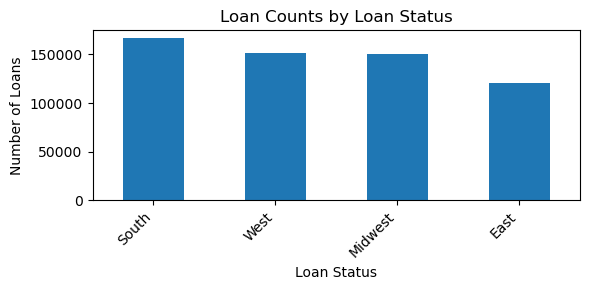

In [110]:
sector_counts = cloans['Region'].value_counts()

plt.figure(figsize=(6,3))
sector_counts.plot(kind='bar')

plt.title('Loan Counts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')

# Rotate labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [111]:
cloans['NaicsCode'] = cloans['NaicsCode'].astype(str) # 'Sector'

In [113]:
cloans['NaicsCodePrefix'] = cloans['NaicsCode'].str[:2]  # or [:3] for more granularity


In [114]:
naics_region_map = {
    '11':'Agriculture,Forestry, Fishing and Hunting',
    '21':'Mining,Quarrying, and Oil and Gas Extraction',
    '22':"Utilities",
    '23':"Construction",
    "31":'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    "42":'Wholesale Trade',
    '44':'Retail Trade',
    '45':'Retail Trade',
    '48':'Transportation and Warehousing',
    '49':'Transportation and Warehousing',
    '51':'Information',
    '52':'Finance and Insurance',
    '53':'Real Estate and Rental and Leasing',
    "54":'Professional, Scientific, and Technical Services',
    '55':"Management of Companies and Enterprises",
    '56':'Administrative and Support and Waste Management and Remediation Services',
    "61":'Educational Services',
    '62':'Health Care and Social Assistance',
    '71':'Arts, Entertainment, and Recreation',
    '72':'Accommodation and Food Services',
    '81':'Other Services (except Public Administration)',
    '92':'Public Administration (not covered in economic census)'

}

cloans['Sector'] = cloans['NaicsCodePrefix'].map(naics_region_map)


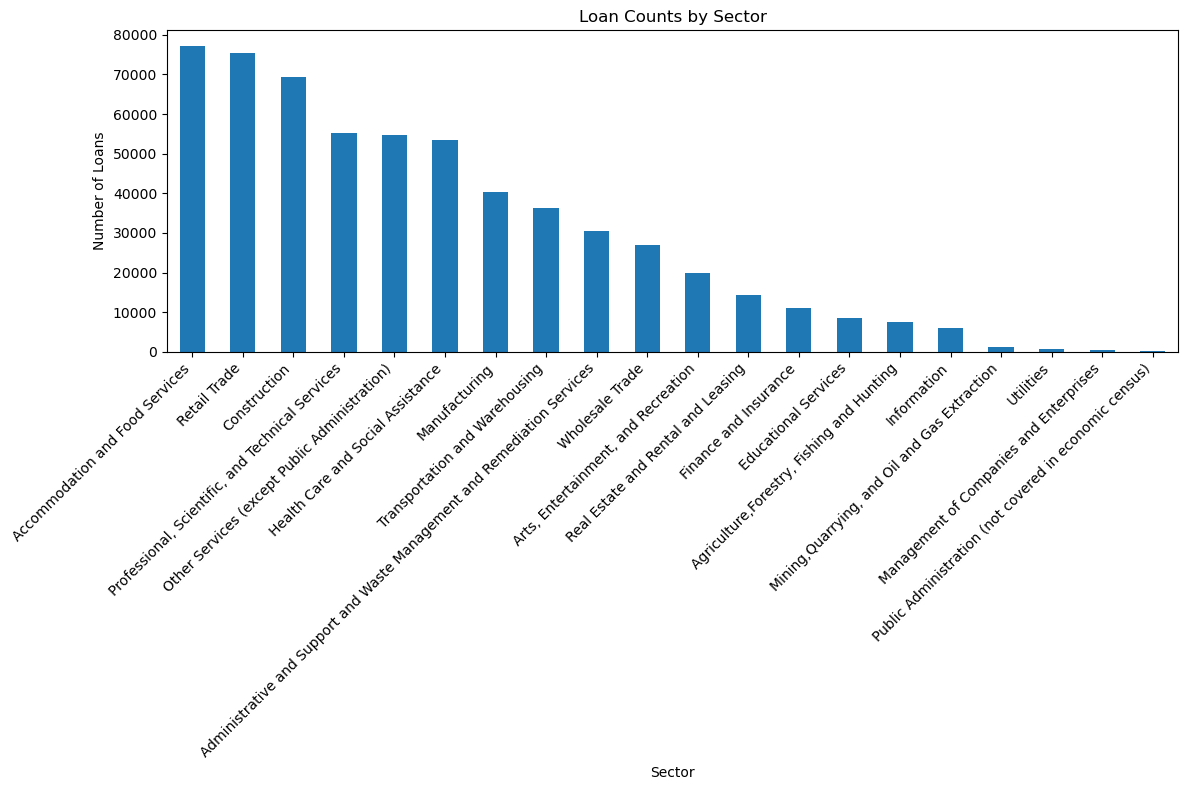

In [115]:
import matplotlib.pyplot as plt

# Sort values and plot
sector_counts = cloans['Sector'].value_counts()

plt.figure(figsize=(12, 8))
sector_counts.plot(kind='bar')

plt.title('Loan Counts by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Loans')

# Rotate labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


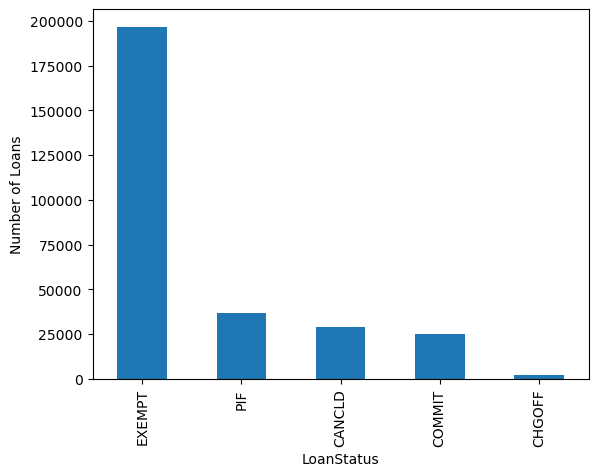

In [116]:
lloans['LoanStatus'].value_counts().plot(kind='bar')
plt.ylabel('Number of Loans');

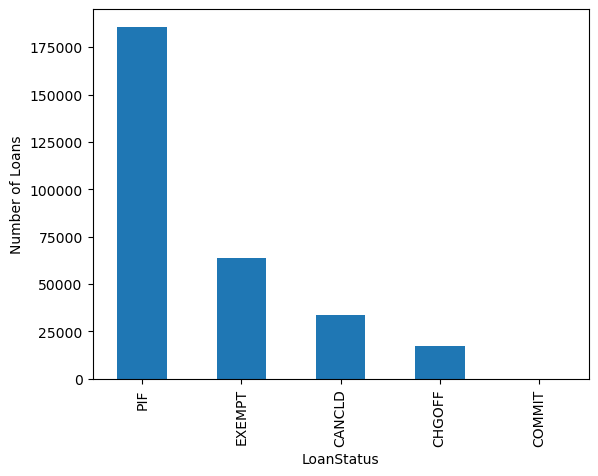

In [117]:
eloans['LoanStatus'].value_counts().plot(kind='bar')
plt.ylabel('Number of Loans');

In [118]:
pd.DataFrame(cloans['LoanStatus'].value_counts())

,count
LoanStatus,
EXEMPT,260158
PIF,222327
CANCLD,62656
COMMIT,24941
CHGOFF,19516


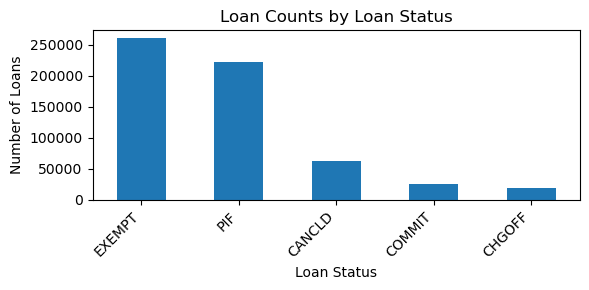

In [119]:
import matplotlib.pyplot as plt

# Sort values and plot
sector_counts = cloans['LoanStatus'].value_counts()

plt.figure(figsize=(6,3))
sector_counts.plot(kind='bar')

plt.title('Loan Counts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')

# Rotate labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


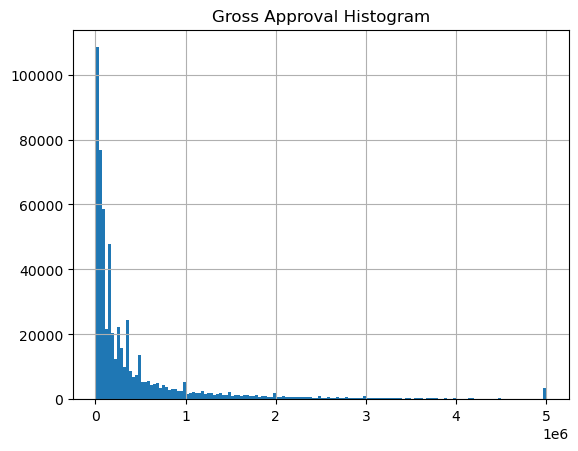

In [120]:
import matplotlib.pyplot as plt

# Sort values and plot
cloans.hist(column='GrossApproval',bins=150)
plt.title('Gross Approval Histogram');

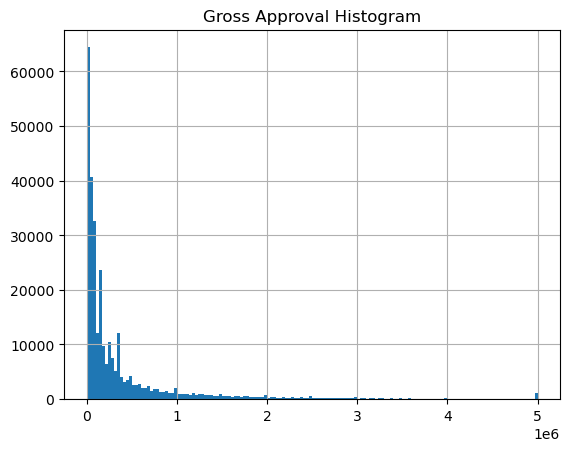

In [121]:
eloans.hist(column='GrossApproval',bins=150)
plt.title('Gross Approval Histogram');

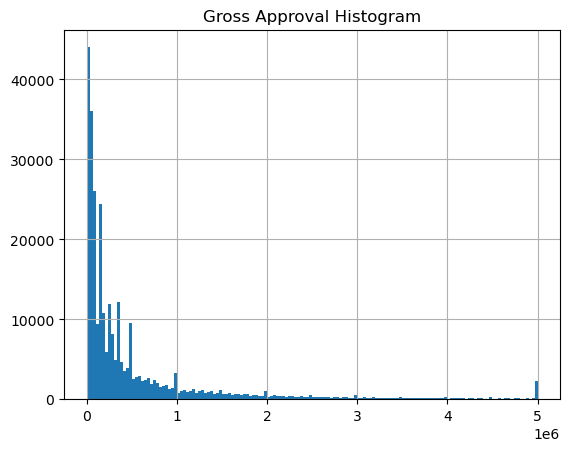

In [122]:
lloans.hist(column='GrossApproval',bins=150)
plt.title('Gross Approval Histogram');

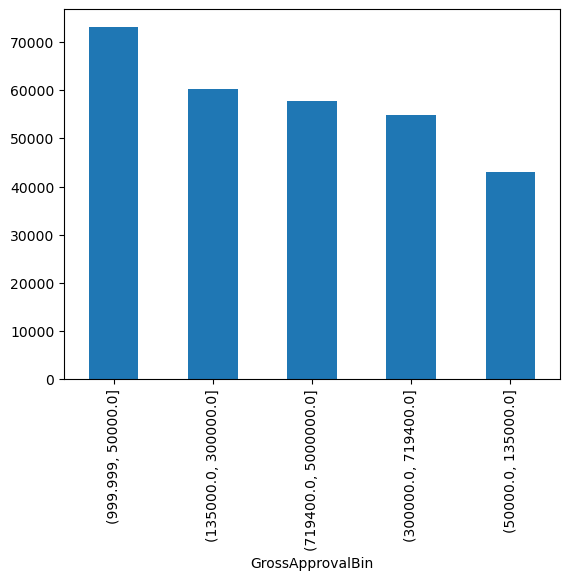

In [123]:
lloans['GrossApprovalBin'].value_counts().plot(kind='bar');

In [124]:
encoded = pd.get_dummies(cloans[['ApprovalMonth', 'ApprovalQuarterStr', 'LoanStatus', 'Sector', 'GrossApprovalBin']], drop_first=False)


In [125]:
#


In [126]:
# Select relevant categorical features
mba_features = ['Region','Sector','LoanStatus', 'GrossApprovalBin', 'ApprovalYear']

# Create the one-hot encoded basket
basket = pd.get_dummies(cloans[mba_features])

# Convert to bool for fpgrowth (optional but recommended)
basket = basket.astype(bool)


In [127]:
basket

,Region_East,Region_Midwest,Region_South,Region_West,Sector_Accommodation and Food Services,Sector_Administrative and Support and Waste Management and Remediation Services,"Sector_Agriculture,Forestry, Fishing and Hunting","Sector_Arts, Entertainment, and Recreation",Sector_Construction,Sector_Educational Services,...,ApprovalYear_2015,ApprovalYear_2016,ApprovalYear_2017,ApprovalYear_2018,ApprovalYear_2019,ApprovalYear_2020,ApprovalYear_2021,ApprovalYear_2022,ApprovalYear_2023,ApprovalYear_2024
30660,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47335,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
47334,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47333,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47332,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525086,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
525084,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
525065,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
525090,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [128]:

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)



In [ ]:
#from mlxtend.frequent_patterns import apriori

#frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)


In [129]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules = rules[rules['lift'] > 1.5]


In [130]:
# Show key columns
ruletable=rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

ruletable

,antecedents,consequents,support,confidence,lift
97,"(Region_South, LoanStatus_COMMIT)",(ApprovalYear_2024),0.010159,0.803380,6.262509
96,(LoanStatus_COMMIT),(ApprovalYear_2024),0.032578,0.770138,6.003379
93,"(ApprovalYear_2015, GrossApprovalBin_(999.999,...",(LoanStatus_PIF),0.022833,0.782902,2.076210
99,"(ApprovalYear_2016, GrossApprovalBin_(999.999,...",(LoanStatus_PIF),0.021460,0.767127,2.034376
90,"(GrossApprovalBin_(40000.0, 100000.0], Approva...",(LoanStatus_PIF),0.018521,0.763957,2.025968
...,...,...,...,...,...
23,"(ApprovalYear_2024, Sector_Construction)",(LoanStatus_EXEMPT),0.012000,0.670171,1.518815
157,(ApprovalYear_2024),(LoanStatus_EXEMPT),0.085412,0.665807,1.508924
132,"(GrossApprovalBin_(609000.0, 5000000.0], Appro...",(LoanStatus_EXEMPT),0.018638,0.665637,1.508538
131,"(GrossApprovalBin_(250000.0, 609000.0], Approv...",(LoanStatus_EXEMPT),0.012989,0.664353,1.505629


In [131]:
ruletable.to_excel('MBA Results 2015-24.xlsx')

In [132]:

eloans['LogGrossApproval'] = np.log1p(eloans['GrossApproval'])

cloans['LogGrossApproval'] = np.log1p(cloans['GrossApproval'])



In [136]:
df2=eloans['LoanStatus']
df2
df4=cloans['LoanStatus']
df4.value_counts()

LoanStatus
EXEMPT    260158
PIF       222327
CANCLD     62656
COMMIT     24941
CHGOFF     19516
Name: count, dtype: int64

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: One-hot encode categorical features
rgr_features = ['Region', 'Sector', 'LoanStatus', 'ApprovalYear']
basket_cat = pd.get_dummies(eloans[rgr_features], drop_first=False)
basket_cat1 = pd.get_dummies(cloans[rgr_features], drop_first=False)
# Step 2: Scale LogGrossApproval
scaler2 = MinMaxScaler()
log_gross_scaled = scaler2.fit_transform(eloans[['LogGrossApproval']])  # keep as DataFrame
scaler3 = MinMaxScaler()
log_gross_scaled1 = scaler3.fit_transform(cloans[['LogGrossApproval']]) 

basket = pd.concat([basket_cat, pd.DataFrame(log_gross_scaled, columns=['LogGrossApproval'], index=eloans.index)], axis=1)
basket1 = pd.concat([basket_cat1, pd.DataFrame(log_gross_scaled1, columns=['LogGrossApproval'], index=cloans.index)], axis=1)

In [138]:
basket

,Region_East,Region_Midwest,Region_South,Region_West,Sector_Accommodation and Food Services,Sector_Administrative and Support and Waste Management and Remediation Services,"Sector_Agriculture,Forestry, Fishing and Hunting","Sector_Arts, Entertainment, and Recreation",Sector_Construction,Sector_Educational Services,...,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF,ApprovalYear_2014,ApprovalYear_2015,ApprovalYear_2016,ApprovalYear_2017,ApprovalYear_2018,ApprovalYear_2019,LogGrossApproval
243525,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,0.836746
243526,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0.356263
243527,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,0.399267
243528,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0.459950
243529,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0.404995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545746,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0.622029
545747,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,0.459248
545748,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0.789559
545749,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0.588249


In [139]:
df1=basket.drop(columns=[col for col in basket.columns if 'LoanStatus'in col])
df3=basket1.drop(columns=[col for col in basket1.columns if 'LoanStatus'in col])

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Sector_encoded'] = le.fit_transform(df2)

le = LabelEncoder()
df4['Sector_encoded'] = le.fit_transform(df4)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2156668435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sector_encoded'] = le.fit_transform(df2)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2156668435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sector_encoded'] = le.fit_transform(df4)


In [141]:
df1.drop(columns=[col for col in df1.columns if 'GrossApprovalBin' in col], inplace=True)
df3.drop(columns=[col for col in df3.columns if 'GrossApprovalBin' in col], inplace=True)

In [142]:
df3.columns

Index(['Region_East', 'Region_Midwest', 'Region_South', 'Region_West',
       'Sector_Accommodation and Food Services',
       'Sector_Administrative and Support and Waste Management and Remediation Services',
       'Sector_Agriculture,Forestry, Fishing and Hunting',
       'Sector_Arts, Entertainment, and Recreation', 'Sector_Construction',
       'Sector_Educational Services', 'Sector_Finance and Insurance',
       'Sector_Health Care and Social Assistance', 'Sector_Information',
       'Sector_Management of Companies and Enterprises',
       'Sector_Manufacturing',
       'Sector_Mining,Quarrying, and Oil and Gas Extraction',
       'Sector_Other Services (except Public Administration)',
       'Sector_Professional, Scientific, and Technical Services',
       'Sector_Public Administration (not covered in economic census)',
       'Sector_Real Estate and Rental and Leasing', 'Sector_Retail Trade',
       'Sector_Transportation and Warehousing', 'Sector_Utilities',
       'Sector_Who

In [143]:
X = df1
y = df2['Sector_encoded']


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = LogisticRegression(
    penalty='l1', 
    solver='saga',      # supports L1 + multiclass
    multi_class='multinomial', 
    max_iter=1000,
    C=5                # Inverse of regularization strength (lower = more regularization)
)
model.fit(X_train, y_train)


/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=5, max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

In [146]:
X_train

,Region_East,Region_Midwest,Region_South,Region_West,Sector_Accommodation and Food Services,Sector_Administrative and Support and Waste Management and Remediation Services,"Sector_Agriculture,Forestry, Fishing and Hunting","Sector_Arts, Entertainment, and Recreation",Sector_Construction,Sector_Educational Services,...,Sector_Transportation and Warehousing,Sector_Utilities,Sector_Wholesale Trade,ApprovalYear_2014,ApprovalYear_2015,ApprovalYear_2016,ApprovalYear_2017,ApprovalYear_2018,ApprovalYear_2019,LogGrossApproval
485133,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0.569625
335797,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.459248
278325,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0.797040
422082,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0.270272
385440,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.622029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266568,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,0.446876
527080,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0.648232
341585,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.687741
540528,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,0.317879


In [147]:
y_pred=model.predict(X_test)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_,)
print('MSE =',mean_squared_error(y_test, y_pred))
print('MAE =',mean_absolute_error(y_test, y_pred))
print('R2 Score=', r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

Intercept: [ 1.03798497  0.92675455 -4.52255313 -0.31379117  2.87160478]
Coefficients: [[ 1.76268882e-06  1.22135696e-01 -2.08374896e-03 -1.44906528e-02
   0.00000000e+00 -1.74610347e-01  1.14375654e-02  6.38162746e-02
  -1.39915239e-01 -1.32006613e-02  0.00000000e+00  0.00000000e+00
   2.24126074e-02  1.56308545e-01  0.00000000e+00  1.14943108e-01
   0.00000000e+00 -3.02820959e-04  2.95559076e-01  0.00000000e+00
  -4.20303478e-02  0.00000000e+00  3.05133225e-02 -1.03818953e-01
   1.62234477e-02  1.82239472e-01 -6.31457209e-04 -7.36679996e-02
   0.00000000e+00  0.00000000e+00  2.52577754e-01]
 [-2.16693342e-02 -1.03237018e-02  4.45303555e-01  5.53105866e-02
   1.68414119e-01 -3.08463241e-02 -6.95814047e-01  3.76905222e-01
   3.72102222e-02  8.84662699e-02 -2.36356872e-01 -4.11952953e-01
  -1.20165606e-02 -8.57662186e-01 -8.89727756e-02  0.00000000e+00
   1.09493348e-01 -7.34826267e-02  9.60960835e-02 -2.46420983e-01
   3.09561798e-02  4.67077472e-01  0.00000000e+00  1.72446253e-01
   0

In [148]:
import numpy as np
import pandas as pd

# Fit your model first
model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
model.fit(X_train, y_train)

# Get coefficients
coef = model.coef_

# For multiclass: coef is (n_classes, n_features)
# Keep features with any non-zero coefficient across classes
non_zero_mask = np.any(coef != 0, axis=0)

# Drop features with zero coefficient
X_train_reduced = X_train.loc[:, non_zero_mask]
X_test_reduced = X_test.loc[:, non_zero_mask]


In [149]:
model.fit(X_train_reduced,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [151]:
y_pred=model.predict(X_test)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_,)
print('MSE =',mean_squared_error(y_test, y_pred))
print('MAE =',mean_absolute_error(y_test, y_pred))
print('R2 Score=', r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

Intercept: [ 1.0716773   0.97240405 -4.66624629 -0.30431823  2.92648317]
Coefficients: [[ 5.25041269e-03  1.27488216e-01 -4.88218941e-03 -1.74251171e-02
   2.23624410e-06 -1.77889108e-01  8.66622893e-03  6.29435364e-02
  -1.43570565e-01 -1.53557465e-02  0.00000000e+00  0.00000000e+00
   1.88902572e-02  1.12938045e-01  0.00000000e+00  5.89374718e-02
   0.00000000e+00  0.00000000e+00  1.41031192e-01  0.00000000e+00
  -4.15498214e-02  0.00000000e+00  0.00000000e+00 -6.45585866e-02
   1.57681262e-02  1.82354776e-01  0.00000000e+00 -6.99225140e-02
   0.00000000e+00  0.00000000e+00  2.51705768e-01]
 [-4.45906139e-02 -3.32759956e-02  4.13018287e-01  2.31094813e-02
   1.83664441e-01 -1.76539692e-02 -6.70875910e-01  3.91252731e-01
   4.85913977e-02  9.61160195e-02 -2.16935715e-01 -3.94919101e-01
   0.00000000e+00 -6.77209557e-01 -7.23234207e-02  0.00000000e+00
   1.24490722e-01 -5.68294236e-02  0.00000000e+00 -2.25668946e-01
   4.65654573e-02  4.81867205e-01  0.00000000e+00  2.25600293e-01
   0

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Initialize the model
rf = RandomForestClassifier(
    n_estimators=121,     # number of trees
    max_depth=10,       # or set a depth if overfitting
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

# Step 3: Fit the model
rf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6250346809903781
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10135
           1       0.00      0.00      0.00      5142
           2       0.00      0.00      0.00        34
           3       0.47      0.13      0.21     19071
           4       0.63      0.96      0.77     55725

    accuracy                           0.63     90107
   macro avg       0.22      0.22      0.19     90107
weighted avg       0.49      0.63      0.52     90107



/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [153]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Optional: scale features for ANN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=42
)

# Define MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # two hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0001,          # L2 penalty (regularization)
    max_iter=300,
    random_state=42
)

# Train model
mlp.fit(X_train, y_train)

# Evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6260038088135412
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8446
           1       0.00      0.00      0.00      4285
           2       0.00      0.00      0.00        28
           3       0.46      0.21      0.29     15892
           4       0.64      0.94      0.76     46438

    accuracy                           0.63     75089
   macro avg       0.22      0.23      0.21     75089
weighted avg       0.50      0.63      0.53     75089



/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [154]:
X2 = df3
y2 = df4['Sector_encoded']

In [155]:
df4

30660                                                           PIF
47335                                                           PIF
47334                                                           PIF
47333                                                        CHGOFF
47332                                                           PIF
                                        ...                        
525084                                                       EXEMPT
525065                                                       EXEMPT
525090                                                       EXEMPT
589597                                                       EXEMPT
Sector_encoded    [4, 4, 4, 1, 4, 0, 4, 4, 3, 4, 4, 0, 4, 4, 4, ...
Name: LoanStatus, Length: 589599, dtype: object

In [203]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2)

model2 = LogisticRegression(
    penalty='l1', 
    solver='saga',      # supports L1 + multiclass
    multi_class='multinomial', 
    max_iter=1000,
    C=0.1                # Inverse of regularization strength (lower = more regularization)
)
model2.fit(X2_train, y2_train)

/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   penalty='l1', solver='saga')

In [204]:
y2_pred=model2.predict(X2_test)
print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_,)
print('MSE =',mean_squared_error(y2_test, y2_pred))
print('MAE =',mean_absolute_error(y2_test, y2_pred))
print('R2 Score=', r2_score(y2_test, y2_pred))
print('Accuracy:', accuracy_score(y2_test,y2_pred))

Intercept: [ 0.49731931  0.22566808 -3.71221727  0.84543867  2.14379121]
Coefficients: [[ 6.29284469e-02  0.00000000e+00 -1.06944437e-03  0.00000000e+00
   0.00000000e+00 -1.03225533e-01  0.00000000e+00  0.00000000e+00
  -2.68209386e-02 -7.52360781e-02  0.00000000e+00  1.10532350e-03
   1.07323265e-02  0.00000000e+00  1.45432410e-02  0.00000000e+00
  -6.54096789e-02  0.00000000e+00  0.00000000e+00  1.07007112e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.97544428e-01]
 [-5.36152608e-02 -1.24820292e-01  3.61136884e-01  1.98889171e-02
   1.44029679e-01  1.40842903e-01 -3.89400614e-01  2.93032331e-01
   2.13168543e-01  0.00000000e+00 -1.24810453e-01 -3.69832625e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.30644876e-06 -1.77580201e-02  0.00000000e+00 -2.2

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split your data
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, stratify =y2, random_state=601
)

# Step 2: Initialize the model
rf2 = RandomForestClassifier(
    n_estimators=150,     # number of trees
    max_depth=20,       # or set a depth if overfitting
    random_state=709,
    n_jobs=-1             # use all CPU cores
)

# Step 3: Fit the model
rf2.fit(X2_train, y2_train)

# Step 4: Predict and evaluate
y2_pred = rf2.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))


Accuracy: 0.6501153324287653
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.00      0.00     15664
           1       0.07      0.00      0.00      4879
           2       0.27      0.01      0.01      6235
           3       0.66      0.79      0.72     65040
           4       0.64      0.79      0.71     55582

    accuracy                           0.65    147400
   macro avg       0.37      0.32      0.29    147400
weighted avg       0.57      0.65      0.59    147400



In [168]:

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y2, test_size=0.2, stratify=y2, random_state=74
)

# Define MLP classifier
mlp2 = MLPClassifier(
    hidden_layer_sizes=(150, 75, 50),  # three hidden layers
    activation='relu',
    solver='adam',
    alpha=0.001,          # L2 penalty (regularization)
    max_iter=600,
    random_state=809
)

# Train model
mlp2.fit(X2_train, y2_train)

# Evaluate
y2_pred = mlp2.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.6541299185888738
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.00      0.00     12531
           1       0.00      0.00      0.00      3903
           2       0.39      0.00      0.01      4988
           3       0.67      0.79      0.73     52032
           4       0.63      0.81      0.71     44466

    accuracy                           0.65    117920
   macro avg       0.40      0.32      0.29    117920
weighted avg       0.58      0.65      0.59    117920



/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [169]:
le = LabelEncoder()
le.fit(cloans['LoanStatus'])  # y_original must be string labels like 'Approved', etc.
print(le.classes_)



['CANCLD' 'CHGOFF' 'COMMIT' 'EXEMPT' 'PIF']


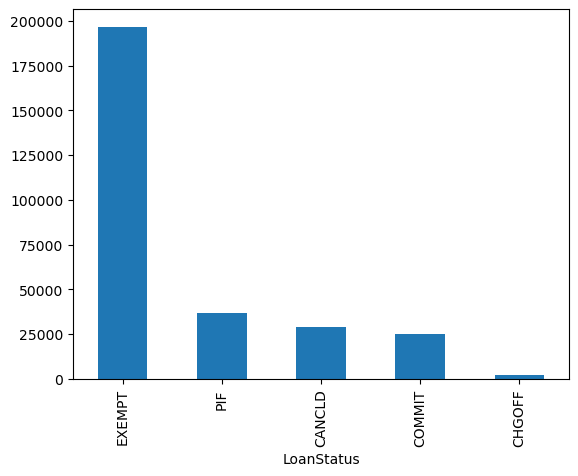

In [170]:
lloans['LoanStatus'].value_counts().plot(kind='bar');

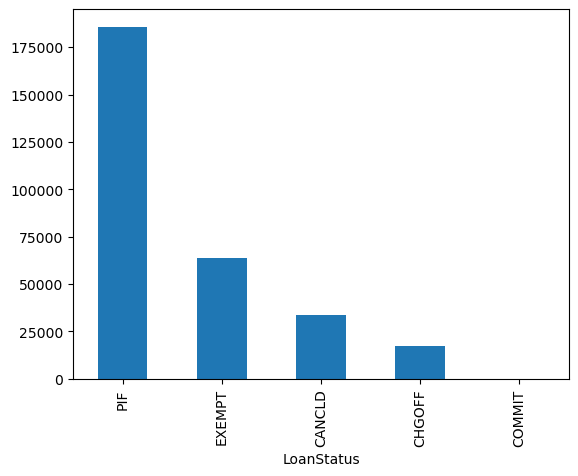

In [171]:
eloans['LoanStatus'].value_counts().plot(kind='bar');

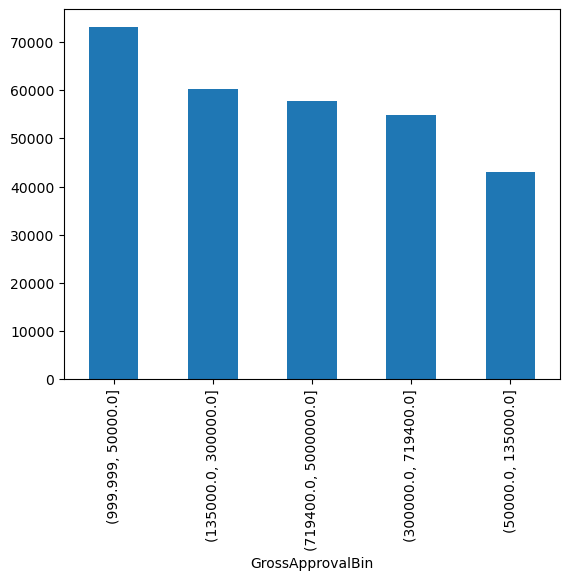

In [172]:
lloans['GrossApprovalBin'].value_counts().plot(kind='bar');

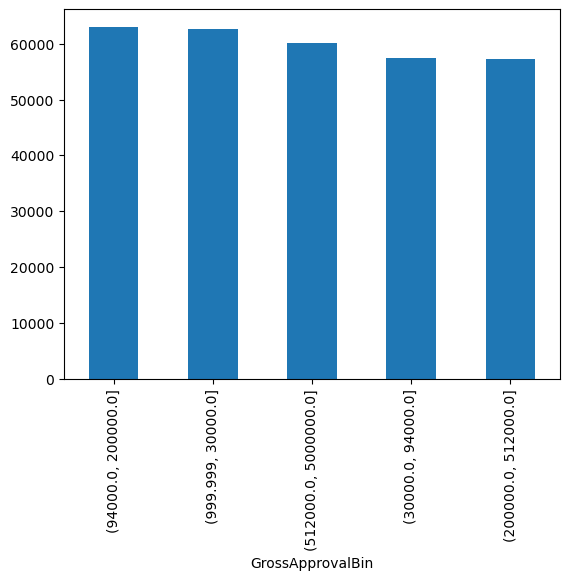

In [173]:
eloans['GrossApprovalBin'].value_counts().plot(kind='bar');

In [175]:
lloans.loc[:,'LogGrossApproval']=np.log1p(lloans.loc[:,'GrossApproval'])

In [187]:
df6=lloans['LoanStatus']

In [179]:
basket_cat2 = pd.get_dummies(lloans[rgr_features], drop_first=False)
# Step 2: Scale LogGrossApproval
scaler3 = MinMaxScaler()
log_gross_scaled3 = scaler2.fit_transform(lloans[['LogGrossApproval']]) 
basket3 = pd.concat([basket_cat2, pd.DataFrame(log_gross_scaled3, columns=['LogGrossApproval'], index=lloans.index)], axis=1)

In [181]:
df5=basket3.drop(columns=[col for col in basket3.columns if 'LoanStatus'in col])

In [191]:
df6['Sector_encoded'] = le.fit_transform(df6)

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2499788036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Sector_encoded'] = le.fit_transform(df6)
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_551/2499788036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Sector_encoded'] = le.fit_transform(df6)


In [192]:
df5.drop(columns=[col for col in df5.columns if 'GrossApprovalBin' in col], inplace=True)

In [193]:
X3 = df5
y3 = df6['Sector_encoded']

In [194]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, stratify=y3)

model3 = LogisticRegression(
    penalty='l1', 
    solver='saga',      # supports L1 + multiclass
    multi_class='multinomial', 
    max_iter=1000,
    C=0.1                # Inverse of regularization strength (lower = more regularization)
)
model3.fit(X3_train, y3_train)

/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   penalty='l1', solver='saga')

In [198]:
y3_pred=model3.predict(X3_test)
print('Intercept:', model3.intercept_)
print('Coefficients:\n', model3.coef_,)
print('MSE =',mean_squared_error(y3_test, y3_pred))
print('MAE =',mean_absolute_error(y3_test, y3_pred))
print('R2 Score=', r2_score(y3_test, y3_pred))
print('Accuracy:', accuracy_score(y3_test,y3_pred))

Intercept: [-0.17131313 -0.60595784 -0.86865197  1.45817462  0.18774832]
Coefficients:
 [[ 5.54636986e-02 -1.21345790e-01  0.00000000e+00  0.00000000e+00
   9.09794756e-02 -7.76638305e-02  0.00000000e+00  0.00000000e+00
  -6.16923809e-02  0.00000000e+00  0.00000000e+00  1.55315516e-02
  -5.52584791e-02  0.00000000e+00  4.30586376e-02  0.00000000e+00
   0.00000000e+00 -3.38193923e-02  0.00000000e+00  8.15241926e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.32652768e-02 -4.37040519e-02
   0.00000000e+00  0.00000000e+00  1.87253017e-01]
 [-1.31722355e-01 -3.03737913e-01  3.14029070e-01  7.60459827e-02
   0.00000000e+00  1.22948684e-01 -1.13841798e-01  0.00000000e+00
   1.37923798e-01  0.00000000e+00  0.00000000e+00 -2.73401347e-01
   0.00000000e+00  0.00000000e+00 -4.03964551e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.70462836e-01  0.00000000e+00  3.34044047e-01
   

In [201]:
# Step 1: Split your data
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, stratify =y3, random_state=601
)

# Step 2: Initialize the model
rf3 = RandomForestClassifier(
    n_estimators=150,     # number of trees
    max_depth=20,       # or set a depth if overfitting
    random_state=709,
    n_jobs=-1             # use all CPU cores
)

# Step 3: Fit the model
rf3.fit(X3_train, y3_train)

# Step 4: Predict and evaluate
y3_pred = rf3.predict(X3_test)

print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))


Accuracy: 0.6754308631091289
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.01      0.02      5774
           1       0.05      0.00      0.00       475
           2       0.27      0.01      0.03      4966
           3       0.69      0.97      0.81     39318
           4       0.40      0.13      0.20      7316

    accuracy                           0.68     57849
   macro avg       0.32      0.22      0.21     57849
weighted avg       0.56      0.68      0.58     57849



In [202]:
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Split data
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_scaled, y3, test_size=0.2, stratify=y3, random_state=74
)

# Define MLP classifier
mlp3 = MLPClassifier(
    hidden_layer_sizes=(150, 75, 50),  # three hidden layers
    activation='relu',
    solver='adam',
    alpha=0.001,          # L2 penalty (regularization)
    max_iter=600,
    random_state=809
)

# Train model
mlp3.fit(X3_train, y3_train)

# Evaluate
y3_pred = mlp3.predict(X3_test)
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.6809452194506387
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.00      0.00      5774
           1       0.00      0.00      0.00       475
           2       0.34      0.01      0.01      4966
           3       0.69      0.98      0.81     39318
           4       0.43      0.09      0.15      7316

    accuracy                           0.68     57849
   macro avg       0.36      0.22      0.20     57849
weighted avg       0.59      0.68      0.57     57849



/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i